# Sentinel-2 Satellite Image Analysis with Python

In [2]:
from glob import glob
import os

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

### Read Sentinel-2 data:

The data consists of 12 bands which according to their website is as follows:

<img src="Images/Sentinel2_Band_details.png">

It should be noted that the band 8A is already contained in band 8. Band 8A is a slice of infra-red that is used for very specific applications (like soil characterization) that you want to eliminate the "noise" of near infra-red. It can be used for ecology (vegetation index) and it is recommended to use the entire band 8. This can be tweaked for specific purposses/applications.

“a TCI (True Colour Image) in JPEG2000 format is included within the Tile folder of Level-1C products in this format(1). The TCI is an RGB image built from the B02 (Blue), B03 (Green), and B04 (Red) Bands. The reflectances are coded between 1 and 255, 0 being reserved for 'No Data'.”
https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/definitions

TCI gives a quick preview of the satellite image in true color thereby being of low data size.

In [3]:
os.chdir("Sentinel_Images/")

In [4]:
# s2_sentinel_bands = glob("Sentinel_Images/*B*.jp2")
s2_sentinel_bands = glob("*B*.jp2")

In [5]:
s2_sentinel_bands.sort()

In [6]:
s2_sentinel_bands

['T45RXL_20210208T043939_B01_60m.jp2',
 'T45RXL_20210208T043939_B02_60m.jp2',
 'T45RXL_20210208T043939_B03_60m.jp2',
 'T45RXL_20210208T043939_B04_60m.jp2',
 'T45RXL_20210208T043939_B05_60m.jp2',
 'T45RXL_20210208T043939_B06_60m.jp2',
 'T45RXL_20210208T043939_B07_60m.jp2',
 'T45RXL_20210208T043939_B09_60m.jp2',
 'T45RXL_20210208T043939_B11_60m.jp2',
 'T45RXL_20210208T043939_B12_60m.jp2',
 'T45RXL_20210208T043939_B8A_60m.jp2']

### NOTE: band 10 is unavailable for this resolution of 60 meters.

In [7]:
# Python3 list to contain all 11 bands-
stacked_s2_sentinel = []

In [8]:
for img in s2_sentinel_bands:
    with rio.open(img, 'r') as f:
        stacked_s2_sentinel.append(f.read(1))

In [10]:
# Sanity check-
len(stacked_s2_sentinel)

11

In [5]:
'''
# Python list to contain bands of file for further analysis-
stacked_s2_sentinel = []

for img in s2_sentinel_bands:
    if img[-7:] == 'TCI.jp2' or img[-7:] == 'B8A.jp2':
        continue
    else:
        with rio.open(img, 'r') as f:
            stacked_s2_sentinel.append(f.read(1))


# Sanity check- 12 bands are read in-
len(stacked_s2_sentinel)
'''

In [15]:
# Stack the 11 individual bands into an n-d array-
stacked_s2_sentinel_img = np.stack(stacked_s2_sentinel)

In [16]:
stacked_s2_sentinel_img.shape

(11, 1830, 1830)

### Visualize Bands:

The data contains 11 bands.

In [11]:
titles = [f'band-{i}' for i in range(1, 13)]

In [12]:
titles.remove('band-10')

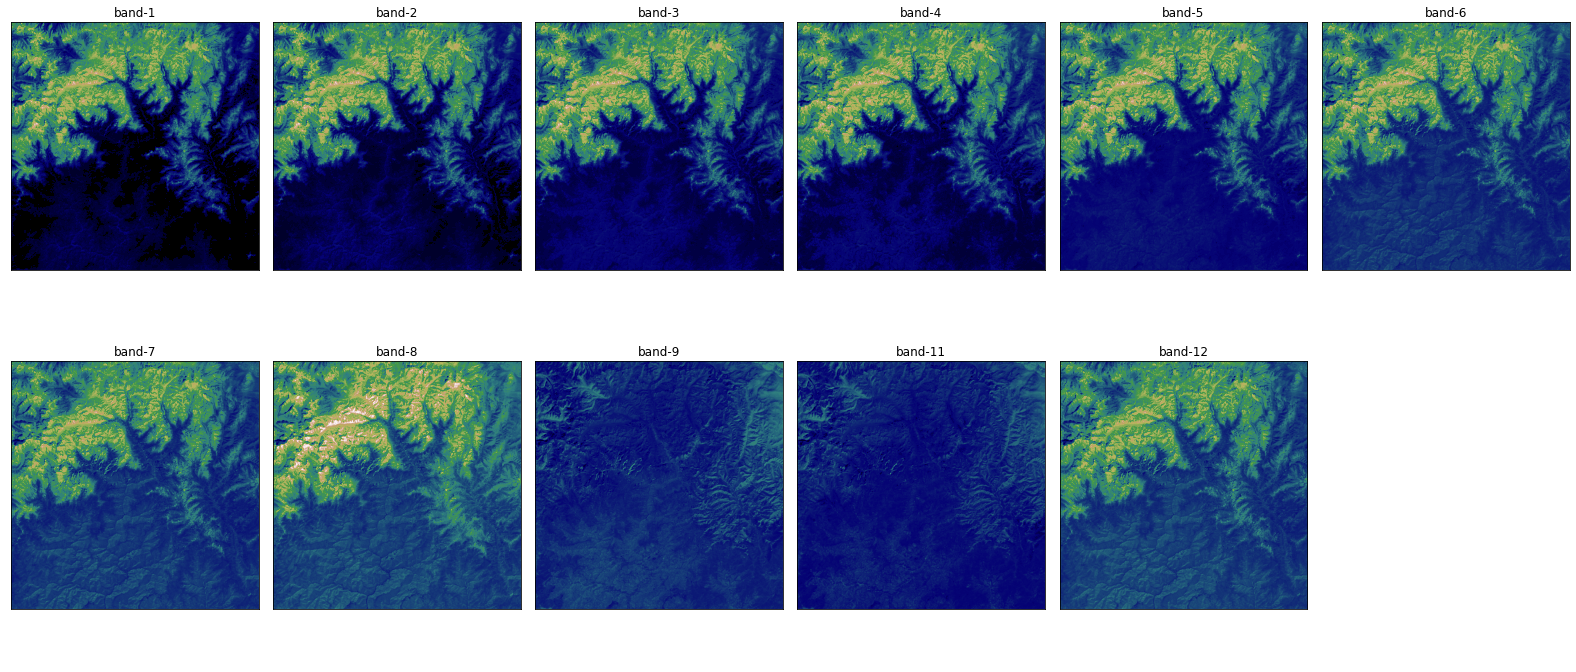

In [17]:
# Visualize each of the 11 bands-
ep.plot_bands(
    arr = stacked_s2_sentinel_img, cmap = 'gist_earth',
    figsize = (22, 10), cols = 6,
    cbar = False, title = titles)

plt.show()

### RGB Composite Image:

The downloaded data has multiple bands containing data ranging from visible spectrum to infrared. To effectively visualize this data, it is necessary to create an RGB Composite image.

To plot RGB composite images, you will plot the red, green and blue bands, which are bands 4, 3 and 2, respectively. The indices for red band = 3, green band = 2 and blue band = 1.

In [18]:
s2_sentinel_bands

['T45RXL_20210208T043939_B01_60m.jp2',
 'T45RXL_20210208T043939_B02_60m.jp2',
 'T45RXL_20210208T043939_B03_60m.jp2',
 'T45RXL_20210208T043939_B04_60m.jp2',
 'T45RXL_20210208T043939_B05_60m.jp2',
 'T45RXL_20210208T043939_B06_60m.jp2',
 'T45RXL_20210208T043939_B07_60m.jp2',
 'T45RXL_20210208T043939_B09_60m.jp2',
 'T45RXL_20210208T043939_B11_60m.jp2',
 'T45RXL_20210208T043939_B12_60m.jp2',
 'T45RXL_20210208T043939_B8A_60m.jp2']

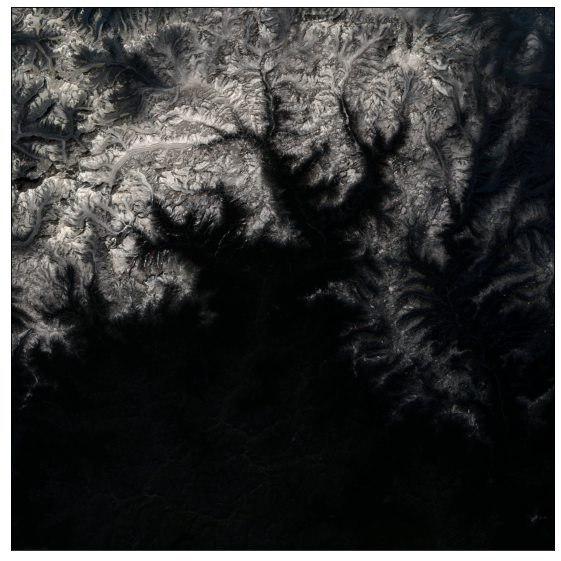

In [19]:
# Plot RGB composite image-
'''
Arguments:

arr : numpy array
    An n-dimensional array in rasterio band order (bands, rows, columns)
    containing the layers to plot.

rgb : list (default = (0, 1, 2))
    Indices of the three bands to be plotted.
'''
rgb = ep.plot_rgb(
    arr = stacked_s2_sentinel_img, rgb = (1, 2, 3),
    figsize =(20, 10) #, title = titles
)

plt.show()